# Exercise 2

## Analyze class homeworks


In [57]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_excel('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/Consolidado_respuestas_escribir_v2.xlsx')
data.head()

,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,NaN
1,F,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,NaN
2,M,Una serie de tiempo es una colección de datos ...,NaN,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r..."
3,M,\nGiven that Time Series Analysis allows to un...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,NaN
4,M,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...


# Exercise 2.1

Analyze the writing patterns of each student

In [58]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download("stopwords")
nltk.download("punkt")

# Obtener las listas de stopwords en español e inglés
stopwords_spanish = set(stopwords.words("spanish"))
stopwords_english = set(stopwords.words("english"))

# Crear un nuevo DataFrame para almacenar los resultados del preprocesamiento
preprocessed_data = data[
    ["Genero"]
].copy()  # Crear un DataFrame con la columna 'Genero'


# Función para preprocesar texto en ambos idiomas
def preprocess_text(text):
    if isinstance(text, str):  # Verificar si el valor es una cadena de texto
        text = text.lower()  # Convertir a minúsculas
        words = word_tokenize(text)  # Tokenización

        # Eliminar stopwords en español e inglés
        words = [
            word for word in words if word.isalpha()
        ]  # Eliminar signos de puntuación y números
        words = [
            word
            for word in words
            if word not in stopwords_spanish and word not in stopwords_english
        ]  # Eliminar stopwords

        return " ".join(words)
    else:
        return str(text)  # Mantener valores numéricos y no cadenas de texto


# Aplicar preprocesamiento a cada columna de tarea (excepto 'Genero')
for columna in data.columns[1:]:
    preprocessed_data[columna] = data[columna].apply(preprocess_text)

# Ahora, preprocessed_data contiene la columna 'Genero' sin procesar y las demás columnas preprocesadas

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [59]:
# Convertir el índice en una columna
preprocessed_data.reset_index(inplace=True)
preprocessed_data.rename(columns={"index": "Estudiante"}, inplace=True)
preprocessed_data

,Estudiante,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview
0,0,M,one valuable application time series analysis ...,main difference panel data time series kind da...,decision tree model used analytics community u...,used make better prediction utilizing single o...,forma arquitectura datos microservicios hacen ...,nan
1,1,F,análisis series tiempo usos análisis series ti...,series tiempo vs datos panel serie tiempo perm...,tipos árboles decisión aplicaciones árboles de...,ensamblaje machine learning métodos ensamblaje...,microservicios objetivo principal implementaci...,nan
2,2,M,serie tiempo colección datos valores variable ...,nan,arboles decisión hacen parte algoritmos aprend...,ensemble methods machine learning technique co...,enfoque tradicional diseño aplicaciones centra...,lexisnexis launched lexis analytics legal rese...
3,3,M,given time series analysis allows understand p...,difference panel data time series dimensional ...,decision trees algorithms machine function tec...,ensemble methods tree decision algorithms brin...,defined type software architecture everyone fu...,nan
4,4,M,time series analysis concerned study interpret...,time series represented variable set variables...,decision trees popular supervised machine lear...,ensemble method combination several machine le...,microservice type information technology cloud...,commercial product uses natural language proce...
5,5,M,time series set data taken interval time days ...,aunque variables tiempo paneles datos basados ...,modelos supervisados pueden usar arboles decis...,nan,microservicios servicios web alcances puntuale...,nan
6,6,M,nan,paso crucial empezar predecir datos general mo...,árboles decisión algoritmos pertenecen familia...,machine learning métodos ensamble principalmen...,arquitectura microservicios simplemente micros...,nan
7,7,M,análisis series tiempo tsa diversidad aplicaci...,panel datos consiste conjunto observaciones co...,árboles decisión consisten métodos aprendizaje...,métodos ensamble permiten mejorar desempeño mo...,microservicios arquitectura microservicios est...,nan
8,8,F,ejemplo número estudiantes semestrales inscrit...,serie tiempo busca modelar comportamiento indi...,algoritmos machine learning supervisados princ...,nan,microservicios tipo arquitectura construcción ...,nan
9,9,M,pronósticos producción análisis inflación prec...,serie tiempo contiene observaciones único fenó...,arboles decisión árboles decisión representaci...,método ensamblaje técnica machine learning com...,microservicios arquitectura desarrollo softwar...,nan


In [60]:
import pandas as pd
from nltk.probability import FreqDist

# Asegurarse de que 'Estudiante' está en una columna y no en el índice
# Ya lo hiciste previamente, así que lo accedemos directamente

# Lista de columnas de tareas
columnas_tareas = [
    "E1 - Examples of Time Series Analysis",
    "E4 - Panel Data",
    "E6 - Decison Trees",
    "E8 - Ensemble Trees Overview",
    "E10 - REST-API",
    "E11 - Natural Language Processing Overview"
]

resultados = pd.DataFrame()

# Asignar la columna 'Estudiante'
resultados["Estudiante"] = preprocessed_data["Estudiante"]

# Calcular la longitud promedio de las respuestas en número de palabras
resultados["Longitud promedio de vocabulario"] = preprocessed_data[columnas_tareas].apply(
    lambda x: round(x.str.split().apply(len).mean()), axis=1
)

# Calcular la cantidad de palabras únicas que usa cada estudiante en todas las tareas
resultados["Palabras Únicas"] = preprocessed_data[columnas_tareas].apply(
    lambda x: len(set(" ".join(x).split())), axis=1
)

print(resultados)

    Estudiante  Longitud promedio de vocabulario  Palabras Únicas
0            0                               118              432
1            1                               147              550
2            2                               122              469
3            3                               127              382
4            4                               187              648
5            5                               101              403
6            6                               125              411
7            7                               112              389
8            8                                50              226
9            9                                59              269
10          10                               105              417
11          11                               131              520
12          12                               132              464
13          13                                37              166
14        

In [61]:
resultados = resultados.merge(preprocessed_data[["Estudiante", "Genero"]], on="Estudiante")
print(resultados.groupby("Genero").mean())

        Estudiante  Longitud promedio de vocabulario  Palabras Únicas
Genero                                                               
F        23.600000                        131.500000       513.000000
M        22.194444                        122.305556       445.472222


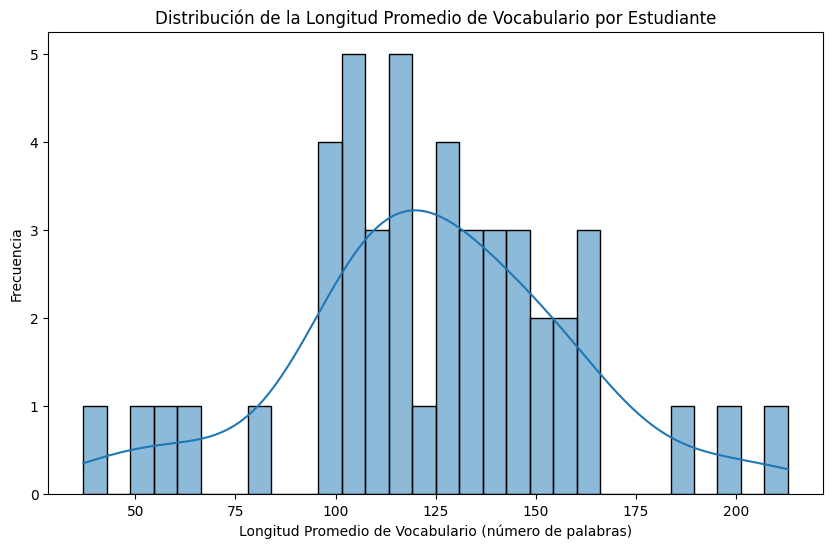

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(resultados["Longitud promedio de vocabulario"], bins=30, kde=True)
plt.title("Distribución de la Longitud Promedio de Vocabulario por Estudiante")
plt.xlabel("Longitud Promedio de Vocabulario (número de palabras)")
plt.ylabel("Frecuencia")
plt.show()

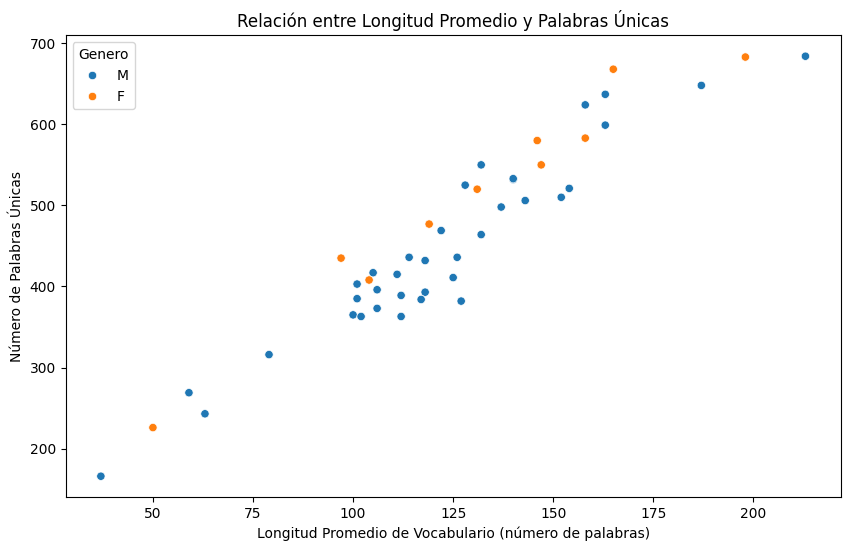

In [63]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Longitud promedio de vocabulario", y="Palabras Únicas", hue="Genero", data=resultados)
plt.title("Relación entre Longitud Promedio y Palabras Únicas")
plt.xlabel("Longitud Promedio de Vocabulario (número de palabras)")
plt.ylabel("Número de Palabras Únicas")
plt.show()

[('datos', 384), ('tiempo', 357), ('cada', 300), ('modelos', 241), ('series', 216), ('microservicios', 206), ('árboles', 192), ('puede', 180), ('diferentes', 174), ('modelo', 170), ('decisión', 165), ('data', 156), ('pueden', 151), ('ser', 150), ('variables', 144), ('servicios', 139), ('variable', 136), ('panel', 134), ('aplicaciones', 123), ('métodos', 123)]


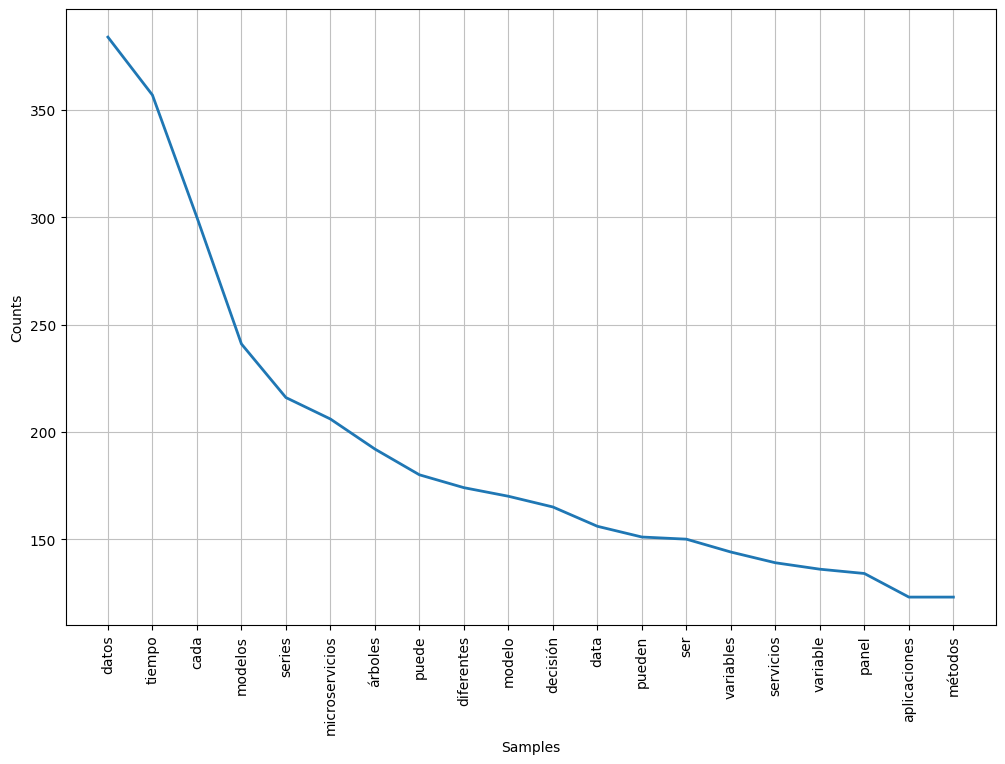

In [64]:
# Concatenar todas las respuestas en una sola cadena
texto_total = " ".join(preprocessed_data[columnas_tareas].fillna("").agg(" ".join, axis=1))
palabras = texto_total.split()

# Calcular la frecuencia de las palabras
freq_dist = FreqDist(palabras)

# Mostrar las 20 palabras más comunes
print(freq_dist.most_common(20))

# Visualizar las 20 palabras más comunes
plt.figure(figsize=(12,8))
freq_dist.plot(20, cumulative=False)
plt.show()

In [65]:
from nltk.tokenize import word_tokenize

# Tokenizar y limpiar cada columna de respuestas
preprocessed_data["Concatenacion_Tokenizada"] = preprocessed_data.iloc[:, 3:].apply(
    lambda row: [word for text in row for word in word_tokenize(text.lower())
                 if word.isalpha() and word not in stopwords_spanish and word not in stopwords_english], axis=1
)

from collections import Counter

# Crear una lista para almacenar las 5 palabras más comunes por estudiante
top_5_words_por_estudiante = []

for index, row in preprocessed_data.iterrows():
    # Obtener las palabras tokenizadas del estudiante actual
    palabras_estudiante = row["Concatenacion_Tokenizada"]

    # Contar la frecuencia de cada palabra
    word_freq = Counter(palabras_estudiante)

    # Obtener las 5 palabras más comunes para este estudiante
    top_5_words = word_freq.most_common(5)

    # Agregar las 5 palabras más comunes al resultado
    top_5_words_por_estudiante.append(
        {"Estudiante": row["Estudiante"], "PalabrasMasComunes": top_5_words}
    )

# Imprimir las 5 palabras más comunes por estudiante
for estudiante_resultado in top_5_words_por_estudiante:
    print(f"Estudiante: {estudiante_resultado['Estudiante']}")
    print("Palabras más comunes:")
    for palabra, freq in estudiante_resultado["PalabrasMasComunes"]:
        print(f"{palabra}: {freq}")
    print()

Estudiante: 0
Palabras más comunes:
data: 14
decision: 11
node: 9
used: 8
microservicios: 8

Estudiante: 1
Palabras más comunes:
https: 15
modelos: 10
modelo: 9
árboles: 9
manera: 7

Estudiante: 2
Palabras más comunes:
decisión: 10
ensemble: 10
arboles: 8
aplicaciones: 7
learning: 7

Estudiante: 3
Palabras más comunes:
data: 15
decision: 15
trees: 12
methods: 11
services: 9

Estudiante: 4
Palabras más comunes:
data: 13
trees: 10
learning: 10
type: 9
using: 9

Estudiante: 5
Palabras más comunes:
datos: 12
modelos: 12
información: 9
tener: 7
pueden: 7

Estudiante: 6
Palabras más comunes:
datos: 16
modelos: 14
cada: 11
tiempo: 9
modelo: 9

Estudiante: 7
Palabras más comunes:
datos: 13
árboles: 11
cada: 10
puede: 10
tiempo: 9

Estudiante: 8
Palabras más comunes:
datos: 5
tiempo: 3
diferentes: 3
panel: 3
clasificación: 3

Estudiante: 9
Palabras más comunes:
manera: 5
decisión: 5
cada: 5
modelos: 5
datos: 4

Estudiante: 10
Palabras más comunes:
microservicios: 10
aplicaciones: 8
datos: 7
tie

# Exercise 2.2

Evaluate the similarities of the homeworks of the students.

At a homework level, then as a student level.


In [66]:
# Seleccionar las 2 primeras columnas
nueva_tabla = preprocessed_data.iloc[:, :2]

# Concatenar las siguientes 6 columnas
nueva_tabla["Concatenacion"] = preprocessed_data.iloc[:, 2:8].apply(
    lambda row: " ".join(row), axis=1
)
print(nueva_tabla)

    Estudiante Genero                                      Concatenacion
0            0      M  one valuable application time series analysis ...
1            1      F  análisis series tiempo usos análisis series ti...
2            2      M  serie tiempo colección datos valores variable ...
3            3      M  given time series analysis allows understand p...
4            4      M  time series analysis concerned study interpret...
5            5      M  time series set data taken interval time days ...
6            6      M  nan paso crucial empezar predecir datos genera...
7            7      M  análisis series tiempo tsa diversidad aplicaci...
8            8      F  ejemplo número estudiantes semestrales inscrit...
9            9      M  pronósticos producción análisis inflación prec...
10          10      M  sector financiero hace uso constante series ti...
11          11      F  series tiempo básicamente colección datos regi...
12          12      M  ejemplo uso series tiempo pr

In [67]:
# Concatenar las respuestas de cada estudiante (convertir listas de palabras en cadenas)
preprocessed_data["Concatenacion_Respuestas"] = preprocessed_data.iloc[:, 3:].apply(
    lambda row: " ".join([" ".join(words) if isinstance(words, list) else words for words in row]), axis=1
)

# Transformar las respuestas en una matriz TF-IDF
tfidf_matrix_estudiantes = vectorizer.fit_transform(preprocessed_data["Concatenacion_Respuestas"])

# Calcular la similitud de coseno entre los estudiantes
similitud_estudiantes = cosine_similarity(tfidf_matrix_estudiantes)

# Mostrar la matriz de similitudes entre estudiantes
similitud_df_estudiantes = pd.DataFrame(similitud_estudiantes, index=preprocessed_data["Estudiante"], columns=preprocessed_data["Estudiante"])
print("Similitud entre estudiantes:")
print(similitud_df_estudiantes)

Similitud entre estudiantes:
Estudiante        0         1         2         3         4         5   \
Estudiante                                                               
0           1.000000  0.048825  0.242569  0.409447  0.331995  0.066047   
1           0.048825  1.000000  0.138427  0.017464  0.040221  0.224935   
2           0.242569  0.138427  1.000000  0.262154  0.230768  0.087810   
3           0.409447  0.017464  0.262154  1.000000  0.386929  0.041197   
4           0.331995  0.040221  0.230768  0.386929  1.000000  0.025796   
5           0.066047  0.224935  0.087810  0.041197  0.025796  1.000000   
6           0.057909  0.244818  0.113538  0.019789  0.018102  0.249888   
7           0.079868  0.268761  0.113808  0.041967  0.038748  0.233787   
8           0.046596  0.166612  0.081077  0.020328  0.018735  0.215303   
9           0.047227  0.215944  0.110824  0.017884  0.019539  0.180647   
10          0.089806  0.219034  0.160763  0.012852  0.010907  0.188614   
11       

In [68]:
# Concatenar las respuestas de todos los estudiantes por tarea (convertir listas de palabras en cadenas)
preprocessed_data_tareas = preprocessed_data.iloc[:, 3:].apply(
    lambda col: " ".join([" ".join(words) if isinstance(words, list) else words for words in col]), axis=0
)

# Transformar las respuestas en una matriz TF-IDF a nivel de tareas
tfidf_matrix_tareas = vectorizer.fit_transform(preprocessed_data_tareas)

# Calcular la similitud de coseno entre las tareas
similitud_tareas = cosine_similarity(tfidf_matrix_tareas)

# Mostrar la matriz de similitudes entre tareas
similitud_df_tareas = pd.DataFrame(similitud_tareas, index=preprocessed_data.columns[3:], columns=preprocessed_data.columns[3:])
print("Similitud entre tareas:")
print(similitud_df_tareas)

Similitud entre tareas:
                                            E4 - Panel Data  \
E4 - Panel Data                                    1.000000   
E6 - Decison Trees                                 0.150216   
E8 - Ensemble Trees Overview                       0.167377   
E10 - REST-API                                     0.107631   
E11 - Natural Language Processing Overview         0.102625   
Concatenacion_Tokenizada                           0.529006   
Concatenacion_Respuestas                           0.529006   

                                            E6 - Decison Trees  \
E4 - Panel Data                                       0.150216   
E6 - Decison Trees                                    1.000000   
E8 - Ensemble Trees Overview                          0.527264   
E10 - REST-API                                        0.135460   
E11 - Natural Language Processing Overview            0.137075   
Concatenacion_Tokenizada                              0.691736   
Concatena

# Exercise 2.3

Create a classifier to predict the gender of each student



Genero
M    36
F    10
Name: count, dtype: int64


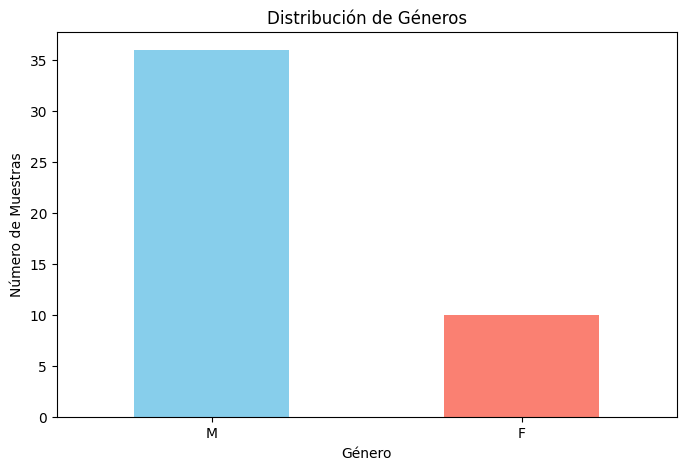

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que nueva_tabla es tu DataFrame
# Contar las muestras por clase utilizando 'value_counts'
clase_distribucion = nueva_tabla["Genero"].value_counts()

# Mostrar la distribución de clases
print(clase_distribucion)

# Opción para visualizar la distribución de clases
plt.figure(figsize=(8, 5))
clase_distribucion.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Géneros')
plt.xlabel('Género')
plt.ylabel('Número de Muestras')
plt.xticks(rotation=0)
plt.show()

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Paso 1: Preparar los datos
# Concatenar las respuestas de cada estudiante
preprocessed_data["Concatenacion_Respuestas"] = preprocessed_data.iloc[:, 3:].apply(
    lambda row: " ".join([" ".join(words) if isinstance(words, list) else words for words in row]), axis=1
)

# Crear la matriz TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_data["Concatenacion_Respuestas"])

# Las etiquetas son la columna 'Genero'
y = preprocessed_data["Genero"]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 2: Entrenar el clasificador
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Paso 3: Evaluar el modelo
y_pred = clf.predict(X_test)

# Imprimir los resultados de evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClasificación:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7

Clasificación:
              precision    recall  f1-score   support

           F       0.00      0.00      0.00         3
           M       0.70      1.00      0.82         7

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Exercise 2.4
Classify group members into different subgroups (minimum 3) according to a characteristic of your choice.

In [71]:
# Define los rangos para la clasificación
criterios = {
    "Estudiante conciso": (
        0,
        450,
    ),  # Tareas cortas (longitud promedio menor o igual a 100)
    "Estudiante equilibrado": (
        450,
        1000,
    ),  # Tareas moderadas (longitud promedio mayor a 100 y menor o igual a 300)
    "Estudiante detallista": (
        1000,
        float("inf"),
    ),  # Tareas largas (longitud promedio mayor a 300)
}


# Función para asignar subgrupos según la longitud promedio de las tareas para cada estudiante
def asignar_subgrupo(longitud_promedio):
    for subgrupo, (min_valor, max_valor) in criterios.items():
        if min_valor <= longitud_promedio <= max_valor:
            return subgrupo


resultados["Subgrupo"] = resultados["Longitud promedio de vocabulario"].apply(
    asignar_subgrupo
)

# Mostrar la clasificación resultante
print(resultados[["Estudiante", "Longitud promedio de vocabulario", "Subgrupo"]])

    Estudiante  Longitud promedio de vocabulario            Subgrupo
0            0                               118  Estudiante conciso
1            1                               147  Estudiante conciso
2            2                               122  Estudiante conciso
3            3                               127  Estudiante conciso
4            4                               187  Estudiante conciso
5            5                               101  Estudiante conciso
6            6                               125  Estudiante conciso
7            7                               112  Estudiante conciso
8            8                                50  Estudiante conciso
9            9                                59  Estudiante conciso
10          10                               105  Estudiante conciso
11          11                               131  Estudiante conciso
12          12                               132  Estudiante conciso
13          13                    

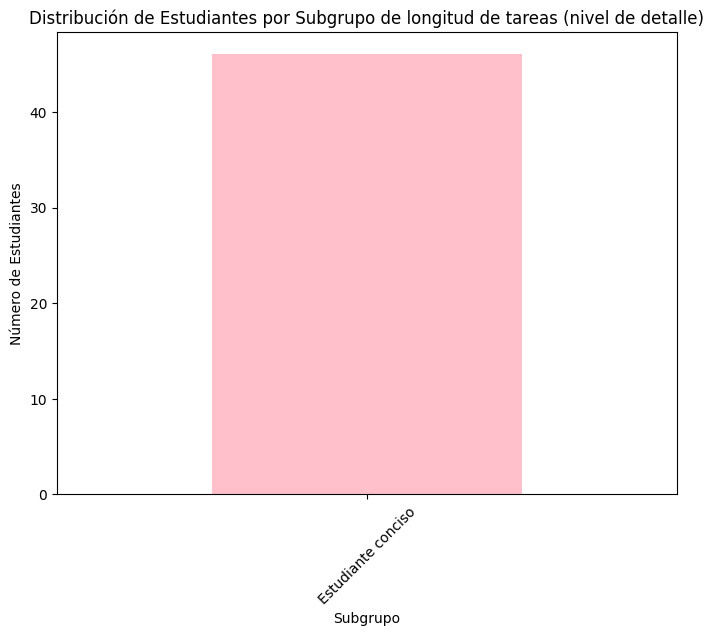

In [72]:
import matplotlib.pyplot as plt

# Contar cuántos estudiantes están en cada subgrupo
conteo_subgrupos = resultados["Subgrupo"].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
conteo_subgrupos.plot(kind="bar", color="pink")
plt.title(
    "Distribución de Estudiantes por Subgrupo de longitud de tareas (nivel de detalle)"
)
plt.xlabel("Subgrupo")
plt.ylabel("Número de Estudiantes")
plt.xticks(rotation=45)
plt.show()

In [73]:
# Define los rangos para la clasificación
criterios = {
    "Estudiante con vocabulario limitado": (50, 250),
    "Estudiante con vocabulario variado": (250, 400),
    "Estudiante con vocabulario extenso": (400, float("inf")),
}


# Función para asignar subgrupos según la longitud promedio de las tareas para cada estudiante
def asignar_subgrupo(palabras_unic):
    for subgrupo, (min_valor, max_valor) in criterios.items():
        if min_valor <= palabras_unic <= max_valor:
            return subgrupo


resultados["Subgrupo"] = resultados["Palabras Únicas"].apply(asignar_subgrupo)

# Mostrar la clasificación resultante
print(resultados[["Estudiante", "Palabras Únicas", "Subgrupo"]])

    Estudiante  Palabras Únicas                             Subgrupo
0            0              432   Estudiante con vocabulario extenso
1            1              550   Estudiante con vocabulario extenso
2            2              469   Estudiante con vocabulario extenso
3            3              382   Estudiante con vocabulario variado
4            4              648   Estudiante con vocabulario extenso
5            5              403   Estudiante con vocabulario extenso
6            6              411   Estudiante con vocabulario extenso
7            7              389   Estudiante con vocabulario variado
8            8              226  Estudiante con vocabulario limitado
9            9              269   Estudiante con vocabulario variado
10          10              417   Estudiante con vocabulario extenso
11          11              520   Estudiante con vocabulario extenso
12          12              464   Estudiante con vocabulario extenso
13          13              166  E

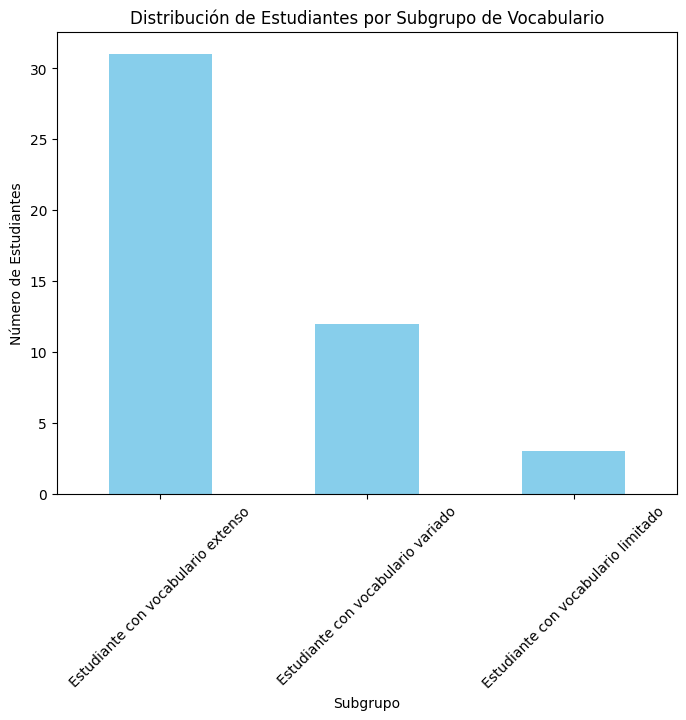

In [74]:
import matplotlib.pyplot as plt

# Contar cuántos estudiantes están en cada subgrupo
conteo_subgrupos = resultados["Subgrupo"].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
conteo_subgrupos.plot(kind="bar", color="skyblue")
plt.title("Distribución de Estudiantes por Subgrupo de Vocabulario")
plt.xlabel("Subgrupo")
plt.ylabel("Número de Estudiantes")
plt.xticks(rotation=45)

plt.show()